In [72]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [73]:
# CIFAR-10 데이터셋 다운로드
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 데이터 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

In [74]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2,
                                                                      random_state=42)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_10 (Flatten)        (None, 1024)            

In [76]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))

Epoch 1/10
1250/1250 [==============================] - 15s 12ms/step - loss: 1.5716 - accuracy: 0.4239 - val_loss: 1.2986 - val_accuracy: 0.5281
Epoch 2/10
1250/1250 [==============================] - 15s 12ms/step - loss: 1.2110 - accuracy: 0.5676 - val_loss: 1.0857 - val_accuracy: 0.6162
Epoch 3/10
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0472 - accuracy: 0.6320 - val_loss: 1.0093 - val_accuracy: 0.6445
Epoch 4/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9377 - accuracy: 0.6707 - val_loss: 0.9787 - val_accuracy: 0.6558
Epoch 5/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.8595 - accuracy: 0.6993 - val_loss: 0.9270 - val_accuracy: 0.6781
Epoch 6/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.7954 - accuracy: 0.7210 - val_loss: 0.9539 - val_accuracy: 0.6703
Epoch 7/10
1250/1250 [==============================] - 16s 13ms/step - loss: 0.7359 - accuracy: 0.7434 - val_loss: 0.9271 -

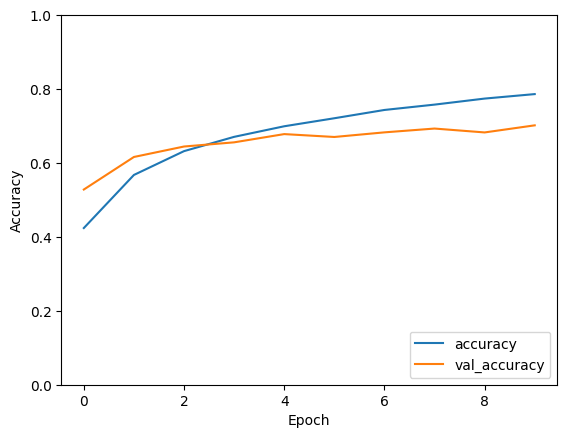

In [81]:
# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [82]:
# 테스트 데이터 예측 및 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.9832 - accuracy: 0.6887 - 1s/epoch - 3ms/step
Test accuracy: 0.6887000203132629


In [83]:
#예측 예시 출력
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)

313/313 [==============================] - 1s 3ms/step


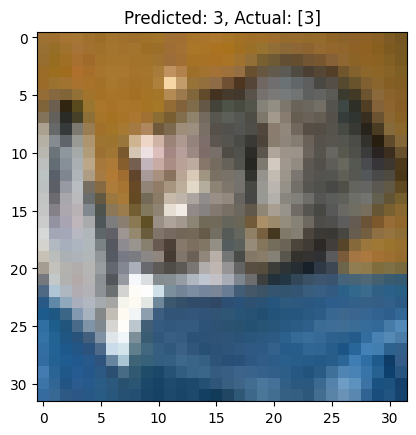

In [84]:
#첫 번째 테스트 이미지 예측 결과 출력
plt.imshow(test_images[0])
plt.title(f"Predicted: {predicted_labels[0]}, Actual: {test_labels[0]}")
plt.show()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                     

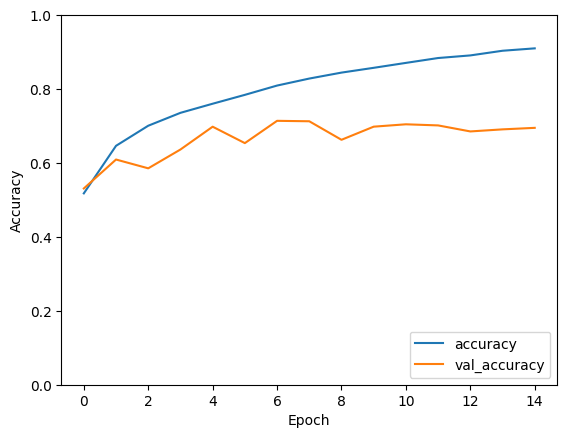

313/313 - 2s - loss: 1.2167 - accuracy: 0.6880 - 2s/epoch - 5ms/step
Test accuracy: 0.6880000233650208
313/313 [==============================] - 2s 5ms/step


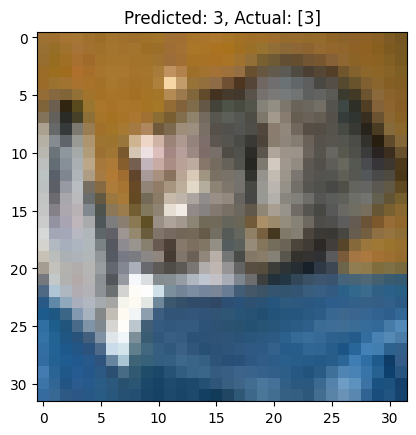

In [86]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load and normalize CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Train, Validation, Test split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Define the CNN model with Batch Normalization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10)
])

model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(val_images, val_labels))

# Visualize training results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Predict on test data and display the first prediction
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)

# Display the first test image prediction result
plt.imshow(test_images[0])
plt.title(f"Predicted: {predicted_labels[0]}, Actual: {test_labels[0]}")
plt.show()
